In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X, y = mnist['data'], mnist['target']

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [10]:
# spilt test data
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

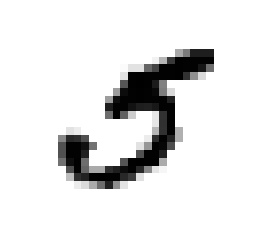

In [34]:
test_digit = X[36000]
plot_digit(test_digit)

In [97]:
# Swift image function
def swift_image(data, direction): # left-0 right-1 up-2 down-3
    swifted_data = data.reshape(28, 28)
    if direction == 0:
        swifted_data = np.roll(swifted_data, -1, axis=1)
    elif direction == 1:
        swifted_data = np.roll(swifted_data, 1, axis=1)
    elif direction == 2:
        swifted_data = np.roll(swifted_data, -1, axis=0)
    elif direction == 3:
        swifted_data = np.roll(swifted_data, 1, axis=0)
    return swifted_data.flatten()


In [96]:
# # test swift
# test_digit = X[36000]
# test_digit = swift_image(test_digit, 3)
# test_digit = swift_image(test_digit, 3)
# test_digit = swift_image(test_digit, 3)
# test_digit = swift_image(test_digit, 3)
# test_digit = swift_image(test_digit, 3)
# test_digit = swift_image(test_digit, 3)
# test_digit.shape
# # plot_digit(test_digit)

(784,)

In [99]:
# Create extend train set
X_train_ext = np.zeros((np.size(X_train, 0) * 5, np.size(X_train, 1)))
y_train_ext = np.zeros(np.size(y_train, 0) * 5)
X_train_ext[:, 0]
row_idx=0
for image_data, label in zip(X_train, y_train):
    y_train_ext[row_idx] = label
    X_train_ext[row_idx, :] = image_data; row_idx+=1
    y_train_ext[row_idx] = label
    X_train_ext[row_idx, :] = swift_image(image_data, 0); row_idx+=1
    y_train_ext[row_idx] = label
    X_train_ext[row_idx, :] = swift_image(image_data, 1); row_idx+=1
    y_train_ext[row_idx] = label
    X_train_ext[row_idx, :] = swift_image(image_data, 2); row_idx+=1
    y_train_ext[row_idx] = label
    X_train_ext[row_idx, :] = swift_image(image_data, 3); row_idx+=1

print("final row index", row_idx)

final row index 300000


In [ ]:
# Check original performance